In [1]:
import numpy as np
import xarray as xr
from scipy import io
from netCDF4 import Dataset as open_ncfile
from functions import lag_linregress_3D
import sys
sys.path.append('/home/ysilvy/Density_bining/Yona_analysis/programs/')
import matplotlib.pyplot as plt
from libToE import ToEdomainrcp85vshistNat
from maps_matplot_lib import defVarmme, averageDom, custom_div_cmap

In [2]:
DW10_boxes_dict = {'SO_subpolar_atl':[-55,-40,27.4,27.7], 'SO_subpolar_pac':[-68,-60,27.5,28], 'SO_subpolar_ind':[-60,-50,27.5,27.9],
             'SH_subtropics_atl':[-45,-32,26.7,27.1], 'SH_subtropics_pac':[-35,-20,26.1,26.8], 'SH_subtropics_ind':[-40,-15,26.6,27.1],
             'NH_subtropics_atl':[25,40,25.6,26.4], 'NH_subtropics_pac':[15,40,24.6,25.8],
             'subpolar_northpac':[50,57,26.2,27]}
DW10_boxes = np.array([[-55,-40,27.4,27.7],[-68,-60,27.5,28],[-60,-50,27.5,27.9],
                       [-45,-32,26.7,27.1],[-35,-20,26.1,26.8],[-40,-15,26.6,27.1],
                      [25,40,25.6,26.4],[15,40,24.6,25.8],[50,57,26.2,27]])
regions = ['SO_subpolar_atl', 'SO_subpolar_pac', 'SO_subpolar_ind', 'SH_subtropics_atl', 'SH_subtropics_pac', 'SH_subtropics_ind', 'NH_subtropics_atl', 'NH_subtropics_pac', 'subpolar_northpac']

In [3]:
# == Read DW10 ==
indir = '/data/ysilvy/Density_binning/obs/'
file = 'fig9.mat'
data = indir + file
f = io.loadmat(data)

lat=f['yi'].squeeze()
density = f['ocean_levels'].squeeze()

DW10_change_a = xr.DataArray(f['chgAtlantic'].T, coords=[density,lat],dims=['density','lat'])
DW10_change_p = xr.DataArray(f['chgPacific'].T, coords=[density,lat],dims=['density','lat'])
DW10_change_i = xr.DataArray(f['chgIndian'].T, coords=[density,lat],dims=['density','lat'])

# == Average trend in regions ==
DW10_change_box = xr.DataArray(np.zeros(9),dims='regions',coords=[regions])
DW10_change_box[0] = DW10_change_a.sel(lat=slice(DW10_boxes[0,0],DW10_boxes[0,1]),density=slice(DW10_boxes[0,2],DW10_boxes[0,3])).mean()
DW10_change_box[1] = DW10_change_p.sel(lat=slice(DW10_boxes[1,0],DW10_boxes[1,1]),density=slice(DW10_boxes[1,2],DW10_boxes[1,3])).mean()
DW10_change_box[2] = DW10_change_i.sel(lat=slice(DW10_boxes[2,0],DW10_boxes[2,1]),density=slice(DW10_boxes[2,2],DW10_boxes[2,3])).mean()
DW10_change_box[3] = DW10_change_a.sel(lat=slice(DW10_boxes[3,0],DW10_boxes[3,1]),density=slice(DW10_boxes[3,2],DW10_boxes[3,3])).mean()
DW10_change_box[4] = DW10_change_p.sel(lat=slice(DW10_boxes[4,0],DW10_boxes[4,1]),density=slice(DW10_boxes[4,2],DW10_boxes[4,3])).mean()
DW10_change_box[5] = DW10_change_i.sel(lat=slice(DW10_boxes[5,0],DW10_boxes[5,1]),density=slice(DW10_boxes[5,2],DW10_boxes[5,3])).mean()
DW10_change_box[6] = DW10_change_a.sel(lat=slice(DW10_boxes[6,0],DW10_boxes[6,1]),density=slice(DW10_boxes[6,2],DW10_boxes[6,3])).mean()
DW10_change_box[7] = DW10_change_p.sel(lat=slice(DW10_boxes[7,0],DW10_boxes[7,1]),density=slice(DW10_boxes[7,2],DW10_boxes[7,3])).mean()
DW10_change_box[8] = DW10_change_p.sel(lat=slice(DW10_boxes[8,0],DW10_boxes[8,1]),density=slice(DW10_boxes[8,2],DW10_boxes[8,3])).mean()


In [4]:
# == Read EN4 ==
file = '/home/ericglod/Density_bining/test/EN4.mon.ocean.Omon.1900_2017.density_v2.nc'
f = xr.open_dataset(file)
time_all = np.arange(1900,2018)
f['time'] = time_all

# Choose period for trend calculation
#yend = 2000
#yend = 2017
yend = 2008

vart = f.isonso.sel(time=slice(1950,yend))
bowl = f.ptopsigma.sel(time=slice(1950,yend)).mean(dim='time')

density = f.lev

# == Compute trend ==
covEN4,corEN4,slopeEN4,interceptEN4,pvalEN4,stderrEN4 = lag_linregress_3D(x=vart.time,y=vart)
EN4_change = slopeEN4*50 #len(vart.time) #*51

# == Average trend in regions ==
EN4_change_box = xr.DataArray(np.zeros(9),dims='regions',coords=[regions])
for i in range(3):
    EN4_change_box[i] = EN4_change.sel(basin=i+1,latitude=slice(DW10_boxes[i,0],DW10_boxes[i,1]),lev=slice(DW10_boxes[i,2],DW10_boxes[i,3])).mean()
    EN4_change_box[i+3] = EN4_change.sel(basin=i+1,latitude=slice(DW10_boxes[i+3,0],DW10_boxes[i+3,1]),lev=slice(DW10_boxes[i+3,2],DW10_boxes[i+3,3])).mean()
EN4_change_box[6] = EN4_change.sel(basin=1,latitude=slice(DW10_boxes[6,0],DW10_boxes[6,1]),lev=slice(DW10_boxes[6,2],DW10_boxes[6,3])).mean()
EN4_change_box[7] = EN4_change.sel(basin=2,latitude=slice(DW10_boxes[7,0],DW10_boxes[7,1]),lev=slice(DW10_boxes[7,2],DW10_boxes[7,3])).mean()
EN4_change_box[8] = EN4_change.sel(basin=2,latitude=slice(DW10_boxes[8,0],DW10_boxes[8,1]),lev=slice(DW10_boxes[8,2],DW10_boxes[8,3])).mean()

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/computation.py:603: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:18

In [5]:
EN4_change_box['obs'] = 'EN4'
DW10_change_box['obs'] = 'DW10'
obs_change_box = xr.concat([DW10_change_box,EN4_change_box],dim='obs')

In [6]:
# == Read models ==
from modelsDef import defModels
import glob,os

models = defModels()
nMembers = np.ma.zeros(len(models)) # Initialize array for keeping nb of members per model

indir_histrcp85 = '/home/ysilvy/Density_bining/Yona_analysis/data/hist_rcp85/'
time = np.arange(1950,2101)
# Old domain names under which boxes coordinates are stored for the models
domains = ['Southern ST', 'SO', 'Northern ST', 'North Atlantic', 'North Pacific']
# Choose where to end time series
y2 = 2008 
trend_models = [0]*11
model_names = ['']*11
imod=0

for i, model in enumerate(models):
#i=2; model=models[i]
    # Read hist+rcp85 files
    listruns = sorted(glob.glob(indir_histrcp85 + 'cmip5.' + model['name'] + '.' + '*zon2D.nc'))
    nruns = len(listruns)
    nMembers[i] = nruns
    if nruns != 0:
        print('Working on', model['name'])
        # Index of common time interval
        tstart = model['props'][2]
        tend = model['props'][3] #2005
        
        model_boxes = xr.DataArray(np.zeros((9,4)),dims=['regions','coord'],coords=[regions,['lat1','lat2','rho1','rho2']])
        model_boxes[0] = ToEdomainrcp85vshistNat(model['name'], 'SO')[0]['Atlantic']
        model_boxes[1] = ToEdomainrcp85vshistNat(model['name'], 'SO')[0]['Pacific']
        model_boxes[2] = ToEdomainrcp85vshistNat(model['name'], 'SO')[0]['Indian']
        model_boxes[3] = ToEdomainrcp85vshistNat(model['name'], 'Southern ST')[0]['Atlantic']
        model_boxes[4] = ToEdomainrcp85vshistNat(model['name'], 'Southern ST')[0]['Pacific']
        model_boxes[5] = ToEdomainrcp85vshistNat(model['name'], 'Southern ST')[0]['Indian']
        model_boxes[6] = ToEdomainrcp85vshistNat(model['name'], 'North Atlantic')[0]['Atlantic']
        model_boxes[7] = ToEdomainrcp85vshistNat(model['name'], 'Northern ST')[0]['Pacific']
        model_boxes[8] = ToEdomainrcp85vshistNat(model['name'], 'North Pacific')[0]['Pacific']

        # Loop over number of runs
        for k in range(nruns):
            namefile = os.path.basename(listruns[k])
            run_nb = namefile.split('.')[3]
            print('    . run number', k, run_nb)

            fhrcp = xr.open_dataset(listruns[k],decode_times=False)
            varkt = fhrcp.isonso.isel(time=slice(tstart+89,tend+95)) #1950-2100
            varkt['time'] = time
            varkt = varkt.sel(time=slice(1950,y2))

            # Average time serie in regions
            varkt_av = xr.DataArray(np.zeros((len(varkt.time),9)),dims=['time','regions'],coords=[varkt.time,regions])
            for ireg in range(3):
                varkt_av[:,ireg] = varkt.sel(basin=ireg+1,latitude=slice(model_boxes[ireg,0],model_boxes[ireg,1]),lev=slice(model_boxes[ireg,2],model_boxes[ireg,3])).mean(dim=('latitude','lev'))
                varkt_av[:,ireg+3] = varkt.sel(basin=ireg+1,latitude=slice(model_boxes[ireg+3,0],model_boxes[ireg+3,1]),lev=slice(model_boxes[ireg+3,2],model_boxes[ireg+3,3])).mean(dim=('latitude','lev'))
            varkt_av[:,6] = varkt.sel(basin=1,latitude=slice(model_boxes[6,0],model_boxes[6,1]),lev=slice(model_boxes[6,2],model_boxes[6,3])).mean(dim=('latitude','lev'))
            varkt_av[:,7] = varkt.sel(basin=2,latitude=slice(model_boxes[7,0],model_boxes[7,1]),lev=slice(model_boxes[7,2],model_boxes[7,3])).mean(dim=('latitude','lev'))
            varkt_av[:,8] = varkt.sel(basin=2,latitude=slice(model_boxes[8,0],model_boxes[8,1]),lev=slice(model_boxes[8,2],model_boxes[8,3])).mean(dim=('latitude','lev'))

            # Compute trend at each grid point
            covk,cork,slopek,interceptk,pvalk,stderrk = lag_linregress_3D(x=varkt.time,y=varkt)
            trendk = slopek*50 #len(varkt.time) 

            # Average trend in regions
            trendk_av = xr.DataArray(np.zeros(9),dims='regions',coords=[regions])
            for ireg in range(3):
                trendk_av[ireg] = trendk.sel(basin=ireg+1,latitude=slice(model_boxes[ireg,0],model_boxes[ireg,1]),lev=slice(model_boxes[ireg,2],model_boxes[ireg,3])).mean()
                trendk_av[ireg+3] = trendk.sel(basin=ireg+1,latitude=slice(model_boxes[ireg+3,0],model_boxes[ireg+3,1]),lev=slice(model_boxes[ireg+3,2],model_boxes[ireg+3,3])).mean()
            trendk_av[6] = trendk.sel(basin=1,latitude=slice(model_boxes[6,0],model_boxes[6,1]),lev=slice(model_boxes[6,2],model_boxes[6,3])).mean()
            trendk_av[7] = trendk.sel(basin=2,latitude=slice(model_boxes[7,0],model_boxes[7,1]),lev=slice(model_boxes[7,2],model_boxes[7,3])).mean()
            trendk_av[8] = trendk.sel(basin=2,latitude=slice(model_boxes[8,0],model_boxes[8,1]),lev=slice(model_boxes[8,2],model_boxes[8,3])).mean()

            # Add dimension to stack members
            varkt_av['members'] = run_nb
            trendk_av['members'] = run_nb
            varkt_av = varkt_av.expand_dims('members') 
            trendk_av = trendk_av.expand_dims('members') 
            if k==0:
                vart_mod = varkt_av
                trend_mod = trendk_av
            else:
                vart_mod = xr.concat([vart_mod,varkt_av],dim='members')
                trend_mod = xr.concat([trend_mod,trendk_av],dim='members')
        
        trend_models[imod] = trend_mod
        model_names[imod] = model['name']
        imod=imod+1
        

Working on CanESM2
    . run number 0 r1i1p1
    . run number 1 r2i1p1
    . run number 2 r3i1p1
    . run number 3 r4i1p1
    . run number 4 r5i1p1
Working on CCSM4
    . run number 0 r1i1p1
    . run number 1 r2i1p1
    . run number 2 r3i1p1
    . run number 3 r4i1p1
    . run number 4 r5i1p1
    . run number 5 r6i1p1
Working on CESM1-CAM5
    . run number 0 r1i1p1
    . run number 1 r2i1p1
    . run number 2 r3i1p1
Working on CSIRO-Mk3-6-0
    . run number 0 r1i1p1
    . run number 1 r2i1p1
    . run number 2 r3i1p1
    . run number 3 r4i1p1
    . run number 4 r5i1p1
    . run number 5 r6i1p1
    . run number 6 r7i1p1
    . run number 7 r8i1p1
    . run number 8 r9i1p1
Working on FGOALS-g2
    . run number 0 r1i1p1
Working on GISS-E2-R
    . run number 0 r1i1p1
    . run number 1 r2i1p1
    . run number 2 r2i1p3
Working on HadGEM2-ES
    . run number 0 r1i1p1
    . run number 1 r3i1p1
Working on IPSL-CM5A-LR
    . run number 0 r2i1p1
    . run number 1 r3i1p1
    . run number 2 r4i1

In [7]:
# == Medians ==
trend_medians_xr = xr.DataArray(np.zeros((len(trend_models),len(regions))),dims=['models','regions'],coords=[model_names,regions])
#trend_medians = [0]*len(regions)
for i in range(len(trend_models)):
    trend_medians_xr[i,:] = trend_models[i].median(dim='members')
    #trend_medians[i] = trend_models[i].median(dim='members')

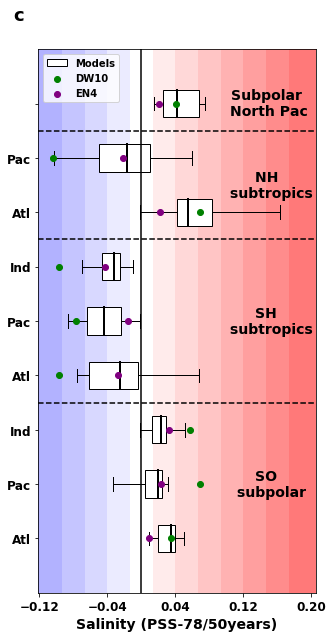

In [13]:
fix,ax=plt.subplots(figsize=(5,10))

from maps_matplot_lib import custom_div_cmap
cmap = custom_div_cmap()

levels = np.linspace(-0.2,0.2,16)
ind = np.arange(len(regions))
boxes = ax.boxplot(trend_medians_xr.T,whis='range',vert=0,widths=0.5,positions=ind,medianprops=dict(color='k',linewidth=2)
                   ,patch_artist=True,boxprops=dict(facecolor='white'),zorder=1)
scatDW10 = plt.scatter(obs_change_box[0,:],np.arange(9),label='DW10',color='green',zorder=2)
scatEN4 = plt.scatter(obs_change_box[1,:],np.arange(9),label='EN4',color='purple',zorder=3)
plt.legend((boxes["boxes"][0],scatDW10,scatEN4),('Models','DW10','EN4'),loc='upper left',prop={'weight':'bold'})

xmin = ax.get_xlim()[0]
xmax = ax.get_xlim()[1]
ax.set_xticks(levels[::3])
# ax.axvspan(xmin, 0, facecolor='blue', alpha=0.1)
# ax.axvspan(0, xmax, facecolor='red', alpha=0.1)
for i in range(1,len(levels)):
    ax.axvspan(levels[i-1], levels[i], facecolor=cmap(i/16),alpha=0.6)
ax.axvspan(0.2, 0.22, facecolor=cmap(i/16),alpha=0.6)
ax.set_xlim(-0.121,0.205)

ax.vlines(x=0,ymin=-1,ymax=9)
# Domain labels
# ax.text(-0.25,ind[1], 'SO \n subpolar', ha='center', va='center', fontweight='bold', fontsize=13)
# ax.text(-0.25,ind[4], 'SH \n subtropics', ha='center', va='center', fontweight='bold', fontsize=13)
# ax.text(-0.25,ind[6]+0.5, 'NH \n subtropics', ha='center', va='center', fontweight='bold', fontsize=13)
# ax.text(-0.2,ind[8], 'Subpolar \n North Pacific', ha='center', va='center',fontweight='bold', fontsize=13)
ax.text(0.15,ind[1], 'SO \n subpolar', ha='center', va='center', fontweight='bold', fontsize=14)
ax.text(0.15,ind[4], 'SH \n subtropics', ha='center', va='center', fontweight='bold', fontsize=14)
ax.text(0.15,ind[6]+0.5, 'NH \n subtropics', ha='center', va='center', fontweight='bold', fontsize=14)
ax.text(0.15,ind[8], 'Subpolar \nNorth Pac', ha='center', va='center',fontweight='bold', fontsize=14)
# Horizontal bars
ax.axhline(y=ind[2]+0.5, color='black', ls='--')
ax.axhline(y=ind[5]+0.5, color='black', ls='--')
ax.axhline(y=ind[7]+0.5, color='black', ls='--')


plt.xlabel('Salinity ('+vart.units+'/50years)',fontweight='bold',fontsize=14)
plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=12)
ax.set_yticklabels(['Atl','Pac','Ind','Atl','Pac','Ind','Atl','Pac'],fontsize=12,fontweight='bold')

plt.subplots_adjust(left=0.2,right=0.97)
ax.set_ylim([-1,9])
plt.figtext(.13,.92,'c',fontweight='bold',fontsize=18)

plt.savefig('fig1c.png',dpi=300) #,bbox_inches='tight'

In [9]:
levels

array([-0.2       , -0.17333333, -0.14666667, -0.12      , -0.09333333,
       -0.06666667, -0.04      , -0.01333333,  0.01333333,  0.04      ,
        0.06666667,  0.09333333,  0.12      ,  0.14666667,  0.17333333,
        0.2       ])